<h1><center>Credit Card Fraud Detection: EDA</center></h1>

I - <b>Quick glance in data.</b>  
    a) Class distribution.  
    b) Amount and Time distribution.

II - <b>Preparing Data.</b>  
    a) Feature Scaling.  
    b) Splitting Data.  
    
III - <b>Handling Imbalaced data.</b>   
    a) two algorithms.  
    
IV - <b> EDA & Feature engineering</b>   
    a) Flew over the data: correlation.  
    b) Distribution of VS of fraud-non fraud.  
    c) Feature Engineering: Finding outlier.
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data =  pd.read_csv('/Users/lucas/Desktop/DS_project/credit_fraud/creditcard.csv')

<br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<br>
<h5>We need to look if there is any null value. </h5>

In [5]:
data.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<b> Perfect, no missing value</b>.

<br>
<h3> I - Quick glance in data : Class, Amout and Time columns.</h3>

<br>
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

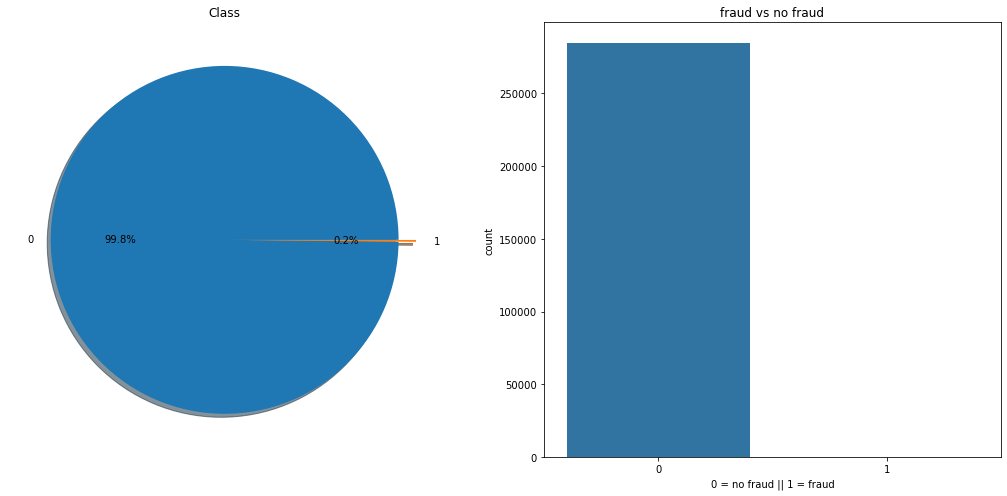

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Class'].value_counts().plot.pie(explode=(0,0.1),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')

sns.countplot(x='Class',data=data,ax=ax[1])
ax[1].set_title('fraud vs no fraud')
ax[1].set_xlabel('0 = no fraud || 1 = fraud')
plt.show()



As one might expect, there are very few fraudsters. <b> (0.2%)</b> This poses a problem:
- We are in case of imbalanced data distribution.
- So, ML classifier algorithms will tend not to take risk and then giving in many case non-fraud.
- To handle imbalanced data there are several ways that we will see in detail below.



<br>
<h4>B - <b>Amount</b> and <b>Time</b> distribution. </h4>

<br>
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

Text(0.5, 1.0, 'Time distribution')

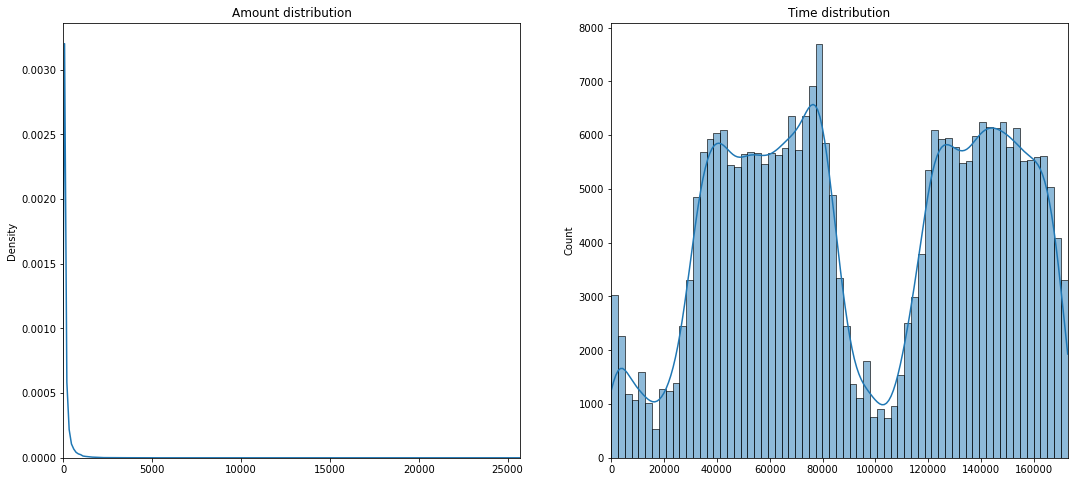

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

amount = data['Amount'].values
time = data['Time'].values

sns.kdeplot(x=amount, ax=ax[0])
ax[0].set_xlim([min(amount), max(amount)])
ax[0].set_title('Amount distribution')


sns.histplot(time, ax=ax[1], kde=True)
ax[1].set_xlim([min(time),max(time)])
ax[1].set_title('Time distribution')



<b> Amount:</b>
 - Most of Amount are less than 5 000 $
 - We need to go further in Amount to better understand it.
    
<b> Time: </b>
- We see 3 range of Time. (0 - 18 000, 18 000 - 100 000, 100 000 - 170 000)

Maybe Amount and Time is skewed, so we will scale those columns.

<br>
<h3> II - Preparing Data (Amount - Time).</h3>
<br>
 To normalize the range of independent variables or features of data will help us to better understand data but it could also help ML algorithms to perform well.

<br><h4>A - Feature Scaling.</h4>

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler() 

data['scalAmount'] = scaler.fit_transform(np.array(data['Amount']).reshape(-1,1))
data['scalTime'] = scaler.fit_transform(np.array(data['Time']).reshape(-1,1))

data = data.drop(['Time', 'Amount'], axis = 1)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scalAmount,scalTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


<br>
<h4>B - Splitting data.</h4>

Be careful to have a similar distribution of the label in the train set and test set.

In [11]:
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit

X = data.drop('Class', axis=1)
y = data['Class']

strat_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in strat_fold.split(X, y):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]


X_train1 = X_train1.values
X_test1 = X_test1.values
y_train1 = y_train1.values
y_test1 = y_test1.values

In [13]:
train_unique_label, train_counts_label = np.unique(y_train1, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test1, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train1))
print(test_counts_label/ len(y_test1))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


<br>
<h3> III - Handling Imbalanced Data.</h3>

<br>
<h4>A - Two algorithms.</h4>

<br>
Classification are more sensitive to detecting the majority Class and less sensitive to the minority Class.

- Thus, the classification output will be biased, in many cases resulting in always predicting the majority class.

In [17]:

data = data.sample(frac=1)


fraud = data.loc[data['Class'] == 1]
non_fraud = data.loc[data['Class'] == 0][:492]

undersampled_data = pd.concat([fraud, non_fraud])

#Shuffling
undersampled_data = undersampled_data.sample(frac=1, random_state=42)


print("After undersampling '1': {}".format(sum(undersampled_data['Class'] == 1))) 
print("After undersampling '0': {}".format(sum(undersampled_data['Class'] == 0))) 


undersampled_data.head()

After undersampling '1': 492
After undersampling '0': 492


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scalAmount,scalTime
66186,-1.497077,1.144027,2.167914,1.065862,-0.881684,0.677413,-0.685913,0.090227,-0.585536,-0.128704,...,0.417041,-0.108134,0.215787,0.081365,-0.153318,0.349222,0.026333,0,-0.173316,-0.903129
14211,-17.275191,10.819665,-20.363886,6.046612,-13.465033,-4.166647,-14.409448,11.580797,-4.073856,-9.153368,...,-1.208096,-0.726839,0.112540,1.119193,-0.233189,1.684063,0.503740,1,0.046539,-1.464786
25357,1.069113,-0.081543,0.645303,1.500371,-0.691602,-0.525919,-0.047113,-0.019396,0.608959,-0.106957,...,-0.738138,0.003144,0.326399,0.426434,-0.531054,0.019032,0.036309,0,-0.076362,-1.289626
79883,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,...,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,1,0.726254,-0.770549
42945,-13.680760,6.990389,-13.770001,8.694897,-11.426968,-2.919845,-14.594562,8.622905,-8.090697,-12.780634,...,0.497599,-0.509290,0.732503,0.280528,0.280037,-1.406687,-0.663643,1,-0.350191,-1.126722


<br>
<h3> IV - EDA. </h3>

<h4> A - flew over the data: correlation. </h4>

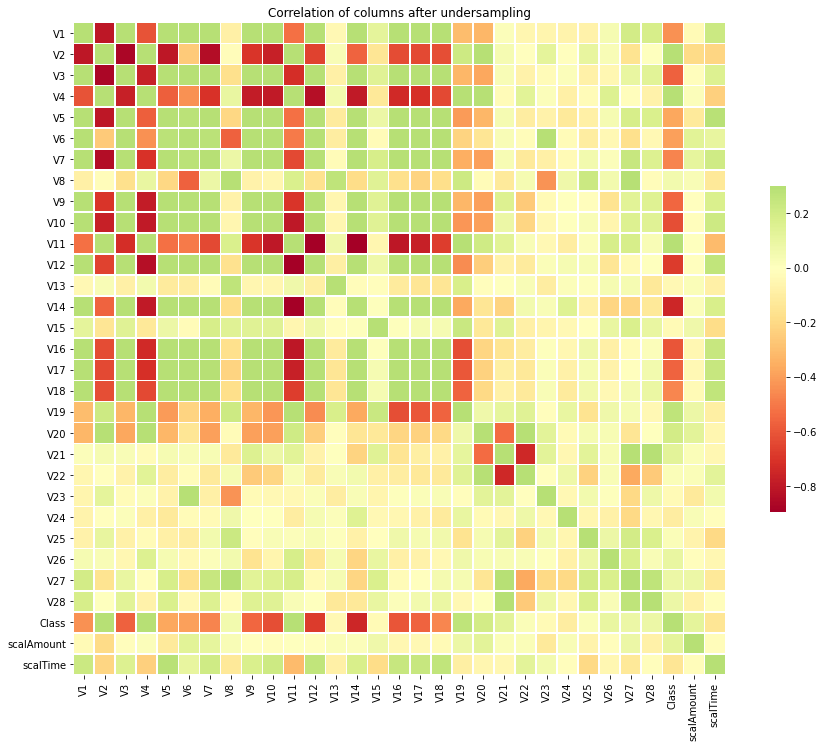

In [23]:
f, ax = plt.subplots(1, 1, figsize=(16,12))


cmap = 'RdYlGn'
sns.heatmap(undersampled_data.corr(),vmax=.3, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_title("Correlation of columns after undersampling")



plt.show()



<b>Class correlation:</b>
- <b>Negative:</b> V3, V9, V10, V12, V14, V16, V17
- <b>Positive:</b> V2, V4, V11, V19

<br>
<h4> B - Distribution of VS of fraud-non fraud.  </h4>

<br>
1 - Negative Correlation.

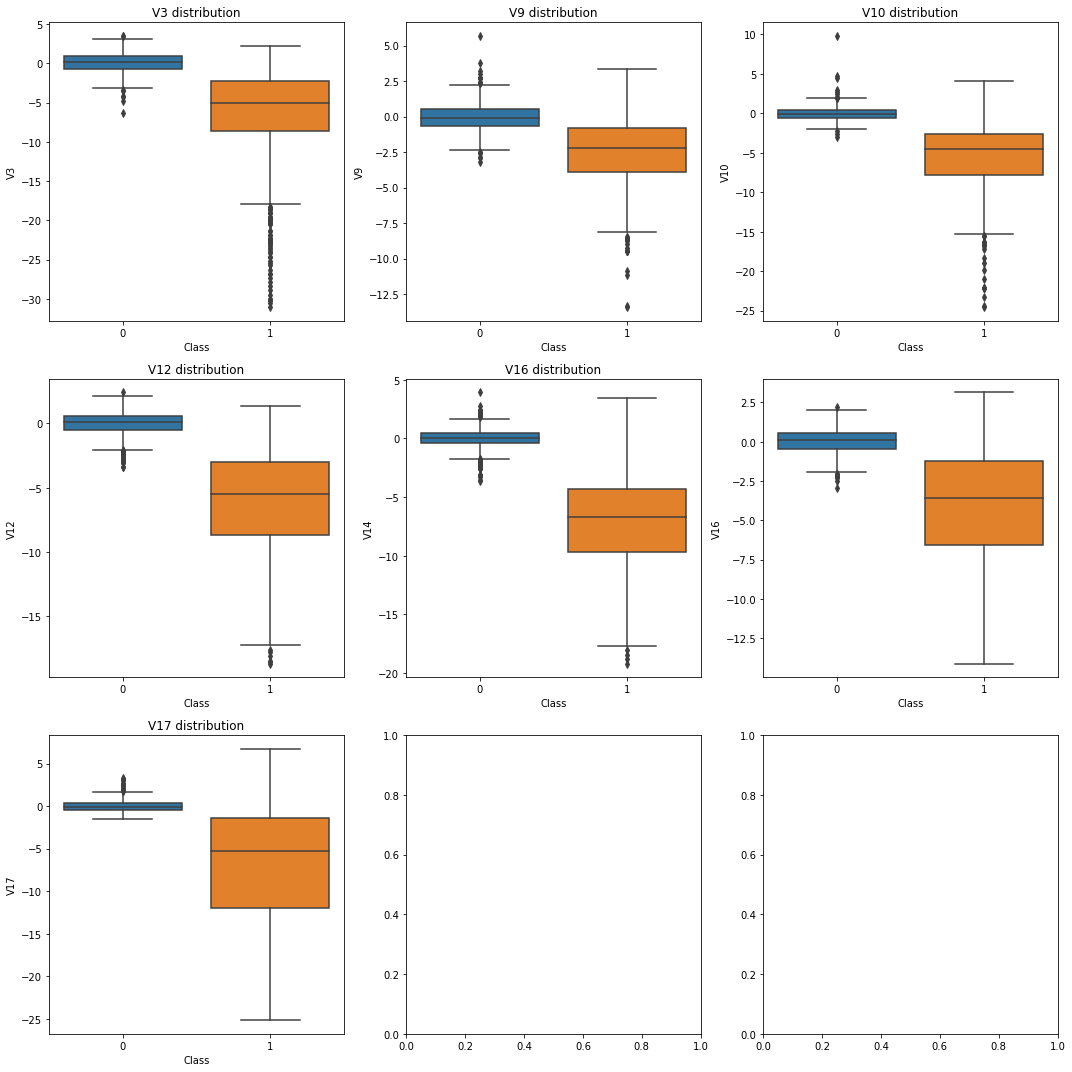

In [28]:
f, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize=(15,15))

sns.boxplot(x='Class', y='V3', data=undersampled_data,ax=ax1[0])
ax1[0].set_title('V3 distribution')



sns.boxplot(x='Class', y='V9', data=undersampled_data,ax=ax1[1])
ax1[1].set_title('V9 distribution')


sns.boxplot(x='Class', y='V10', data=undersampled_data,ax=ax1[2])
ax1[2].set_title('V10 distribution')


sns.boxplot(x='Class', y='V12', data=undersampled_data,ax=ax2[0])
ax2[0].set_title('V12 distribution')


sns.boxplot(x='Class', y='V14', data=undersampled_data,ax=ax2[1])
ax2[1].set_title('V14 distribution')


sns.boxplot(x='Class', y='V16', data=undersampled_data,ax=ax2[2])
ax2[1].set_title('V16 distribution')


sns.boxplot(x='Class', y='V17', data=undersampled_data,ax=ax3[0])
ax3[0].set_title('V17 distribution')


f.tight_layout()

<br>
2 - positive correlation.

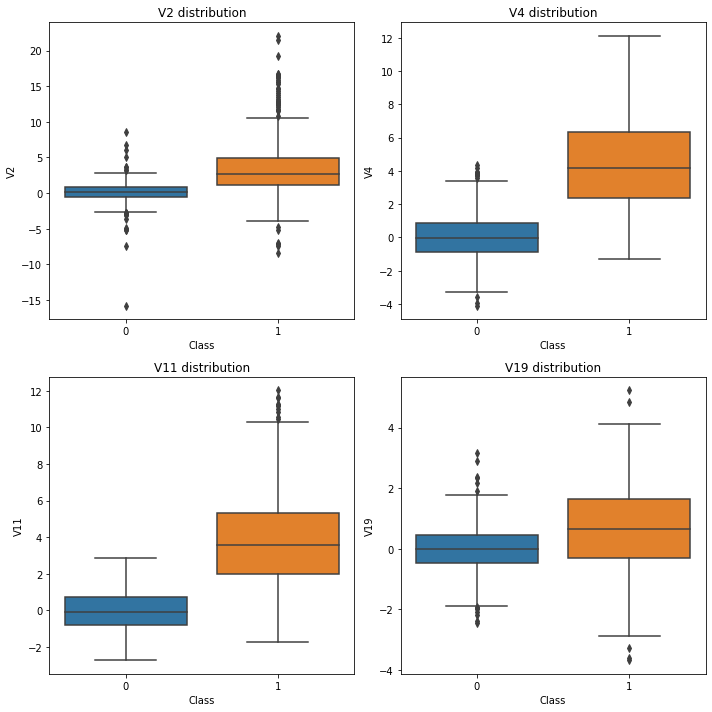

In [29]:
f, (ax1,ax2) = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x='Class', y='V2', data=undersampled_data,ax=ax1[0])
ax1[0].set_title('V2 distribution')



sns.boxplot(x='Class', y='V4', data=undersampled_data,ax=ax1[1])
ax1[1].set_title('V4 distribution')


sns.boxplot(x='Class', y='V11', data=undersampled_data,ax=ax2[0])
ax2[0].set_title('V11 distribution')


sns.boxplot(x='Class', y='V19', data=undersampled_data,ax=ax2[1])
ax2[1].set_title('V19 distribution')




f.tight_layout()

we notice several things:
- There is a large distribution in 0 Class.
- It seems we have propably lot of outliers.

<br>
<h4> C - Feature engineering: find <b>outliers</b>. </h4>

In order not to lose too much information, we will only remove the "extreme" outliers.

In [30]:
#undersampled_data = undersampled_data.drop(columns=[ 'V1','V2','V3','V4','V5', 'V6', 'V7', 'V9', 'V8', 'V11', 'V13', 'V15','V16','V17', 'V18','V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scalAmount', 'scalTime'])



<br>
1 - IQR score.

In [31]:
def remove_outlier(df, column, th):
    fraud = df[column].loc[df['Class'] == 1].values
    q1, q3 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    
    IQR = q3 - q1

    IQR_th = IQR * th
    lower, upper = q1 - IQR_th, q3 + IQR_th
    
    print('Lower: {}'.format(lower))
    print('Upper: {}'.format(upper))
    outliers = [x for x in fraud if x < lower or x > upper]
    print('Feature Outliers for Fraud Cases: {}'.format(len(outliers)))
    df = df.drop(df[(df[column] > upper) | (df[column] < lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(df)))
    print('----' * 30)
    return df,outliers

In [32]:

(undersampled_data,_) = remove_outlier(undersampled_data, 'V10', 1.5)
(undersampled_data,_) = remove_outlier(undersampled_data, 'V12', 1.5)
(undersampled_data,_) = remove_outlier(undersampled_data, 'V14', 1.5)

Lower: -15.47046969983434
Upper: 5.099587558797303
Feature Outliers for Fraud Cases: 19
Number of Instances after outliers removal: 964
------------------------------------------------------------------------------------------------------------------------
Lower: -16.922496886663865
Upper: 5.633585132371216
Feature Outliers for Fraud Cases: 13
Number of Instances after outliers removal: 951
------------------------------------------------------------------------------------------------------------------------
Lower: -17.101993690511843
Upper: 3.3988933645677344
Feature Outliers for Fraud Cases: 5
Number of Instances after outliers removal: 945
------------------------------------------------------------------------------------------------------------------------
